In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('data_set_20210520_v_0_01.csv', parse_dates=['Date_Start','Date_End'])

In [3]:
hourInterval = (data.Date_End-data.Date_Start).astype('timedelta64[m]')/60
data.insert(3, "HourInterval", hourInterval)

0.1

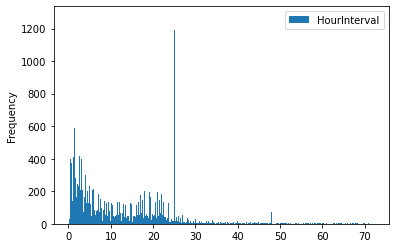

In [4]:
data.loc[data.HourInterval != 24, ['HourInterval']].plot.hist(bins=400)#(bins=400)
data.HourInterval.min()

In [6]:
data.loc[data.HourInterval != 24000].HourInterval.value_counts()

24.000000    11722
23.000000     1255
25.000000     1192
1.000000       534
1.500000       440
             ...  
66.300000        1
3.150000         1
63.200000        1
23.916667        1
3.983333         1
Name: HourInterval, Length: 843, dtype: int64

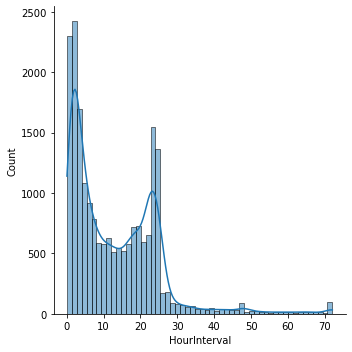

In [15]:
sns.displot(data.HourInterval.loc[data.HourInterval != 24], kde=True)

In [9]:
data.Main_Engine_Total_Consumption/data.HourInterval

0             NaN
1        0.257840
2        0.849973
3        0.062164
4        0.032142
           ...   
31946         NaN
31947         NaN
31948         NaN
31949    0.150273
31950         NaN
Length: 31951, dtype: float64

In [78]:
consPerHour = data.Main_Engine_Total_Consumption/data.HourInterval
#data.insert(-1, "ConsumptionPerHour", consPerHour)

In [88]:
data.Main_Engine_Total_Consumption.isnull().value_counts()

False    21944
True     10007
Name: Main_Engine_Total_Consumption, dtype: int64

In [16]:
data

,Vessel_Name,Date_Start,Date_End,HourInterval,Vessel_Position_Latitude,Vessel_Position_Longitude,Vessel_Speed,Deadweigth_tonage,Main_Engine_Total_Revolution,Main_Engine_Working_Hours,Main_Engine_Total_Consumption
0,Vessel_1,2019-08-02 03:00:00,2019-08-03 02:00:00,23.0,36.813800,135.224816,0.0000,23767.956,NaN,NaN,NaN
1,Vessel_1,2019-08-03 02:00:00,2019-08-04 09:12:00,31.2,36.525833,134.891334,NaN,23767.956,34304.000,10.0104,8.0446
2,Vessel_1,2019-08-04 09:12:00,2019-08-05 07:30:00,22.3,37.488667,138.743334,3.1598,35448.732,76297.456,23.0136,18.9544
3,Vessel_1,2019-08-05 07:30:00,2019-08-06 03:00:00,19.5,37.630000,138.886000,NaN,35448.732,5664.448,1.7544,1.2122
4,Vessel_1,2019-08-06 03:00:00,2019-08-07 03:00:00,24.0,37.612333,138.850334,NaN,35448.732,4263.344,1.4448,0.7714
...,...,...,...,...,...,...,...,...,...,...,...
31946,Vessel_68,2020-01-05 16:00:00,2020-01-06 16:00:00,24.0,14.946000,-65.287834,0.0000,72469.656,NaN,NaN,NaN
31947,Vessel_68,2020-01-06 16:00:00,2020-01-07 16:00:00,24.0,14.857667,-65.287834,0.0000,72469.656,NaN,NaN,NaN
31948,Vessel_68,2020-01-07 16:00:00,2020-01-07 22:42:00,6.7,14.850600,-65.287834,0.0000,72469.656,NaN,NaN,NaN
31949,Vessel_68,2020-01-07 22:42:00,2020-01-08 02:00:00,3.3,14.822333,-65.287834,NaN,72469.656,4132.560,1.5480,0.4959


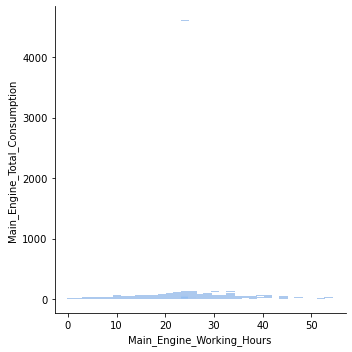

In [22]:
sns.displot(data=data, x="Main_Engine_Working_Hours", y="Main_Engine_Total_Consumption")

In [27]:
data.Main_Engine_Total_Consumption.value_counts()

0.220400     541
0.110200     516
0.330600     474
0.440800     373
0.551000     299
            ... 
48.311680      1
56.290160      1
0.783522       1
0.304152       1
21.687360      1
Name: Main_Engine_Total_Consumption, Length: 3418, dtype: int64

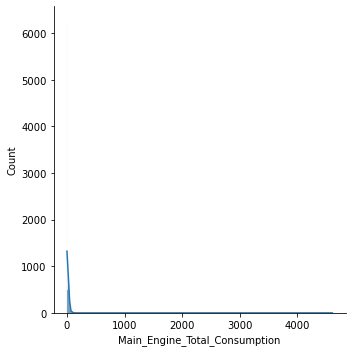

In [25]:
sns.displot(data.Main_Engine_Total_Consumption, kde=True)

In [31]:
import plotly.express as px


fig = px.scatter_geo(data, lat='Vessel_Position_Latitude',lon='Vessel_Position_Longitude', hover_name="Vessel_Name")
fig.update_layout(title = 'World map', title_x=0.5)
fig.update_traces(marker_size=0.4)
fig.show()
